# Problem 2 - Travelling Salesperson

In [9]:
%run ./ML_assignment2_OptimizationFunctions.ipynb

In [2]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4),
               (3, 6), (1, 5), (2, 3)]
prob = mh.TSPOpt(length = 8, coords = coords_list, maximize=False)

# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), 
               (3, 6), (1, 5), (2, 3),(16, 4), (14, 4),
               (13, 6), (11, 5), (21, 3),(11, 11), (4, 12)
              ]
prob2 = mh.TSPOpt(length = 15, coords = coords_list, maximize=False)

In [3]:
#  rhc
max_attempts = 100
max_iters = 100
result_rhc, curve_rhc = rhc(prob, max_attempts, max_iters)
print(result_rhc) 
# plt.plot(range(1, 101), curve_rhc[:,0], label='rhc', color='green')

# increase samples
max_attempts = 100
max_iters = 1000
result_rhc2, curve_rhc2 = rhc(prob2, max_attempts, max_iters)

  algo  best fitness  iterations     time
0  rhc     17.342618         100  0.09375


In [4]:
# sa
max_attempts = 100
max_iters = 100
schedule = mh.ExpDecay()
result_sa, curve_sa = sa(prob, max_attempts, max_iters, schedule)
print(result_sa)
# plt.plot(curve_sa[:,0], curve_sa[:,1], label='sa', color='red')

max_attempts = 100
max_iters = 1000
schedule = mh.ExpDecay()
result_sa2, curve_sa2 = sa(prob2, max_attempts, max_iters, schedule)
print(result_sa2)

  algo  best fitness  iterations  time
0   sa     22.131873         100   0.0
  algo  best fitness  iterations  time
0   sa     58.574526         505   0.0


In [5]:
# ga
max_attempts = 100
max_iters = 100
mutation_prob = 0.2
schedule = mh.ExpDecay()
result_ga, curve_ga = ga(prob, max_attempts, max_iters, mutation_prob)
print(result_ga)
# plt.plot(curve_ga[:,0], curve_ga[:,1], label='ga', color='orange')

max_attempts = 100
max_iters = 1000
mutation_prob = 0.2
schedule = mh.ExpDecay()
result_ga2, curve_ga2 = ga(prob2, max_attempts, max_iters, mutation_prob)
print(result_ga2)

  algo  best fitness  iterations      time
0   ga     17.342618         100  0.515625
  algo  best fitness  iterations    time
0   ga     57.549865         157  0.5625


In [6]:
# mimc
max_attempts = 100
max_iters = 100
keep_pct = 0.2
schedule = mh.ExpDecay()
result_mimic, curve_mimic = mimic(prob, max_attempts, max_iters, keep_pct)
print(result_mimic)
# plt.plot(curve_mimic[:,0], curve_mimic[:,1], label='mimic', color='orange')

max_attempts = 100
max_iters = 1000
keep_pct = 0.2
schedule = mh.ExpDecay()
result_mimic2, curve_mimic2 = mimic(prob2, max_attempts, max_iters, keep_pct)
print(result_mimic2)

   algo  best fitness  iterations      time
0  mimc      18.18034         100  2.265625
   algo  best fitness  iterations     time
0  mimc     77.882142         104  4.46875


In [7]:
# final performance df
fps = pd.DataFrame()
fps=fps.append([result_rhc, result_sa, result_ga, result_mimic]).reset_index()
fps2 = pd.DataFrame()
fps2=fps2.append([result_rhc2, result_sa2, result_ga2, result_mimic2]).reset_index()
print(fps)
print(fps2)

   index  algo  best fitness  iterations      time
0      0   rhc     17.342618         100  0.093750
1      0    sa     22.131873         100  0.000000
2      0    ga     17.342618         100  0.515625
3      0  mimc     18.180340         100  2.265625
   index  algo  best fitness  iterations      time
0      0   rhc     57.549865         214  0.546875
1      0    sa     58.574526         505  0.000000
2      0    ga     57.549865         157  0.562500
3      0  mimc     77.882142         104  4.468750


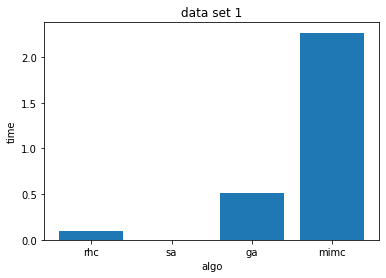

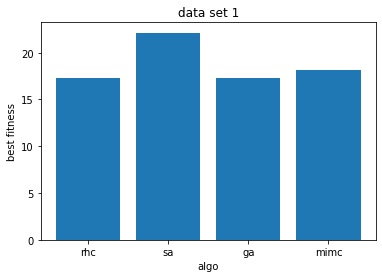

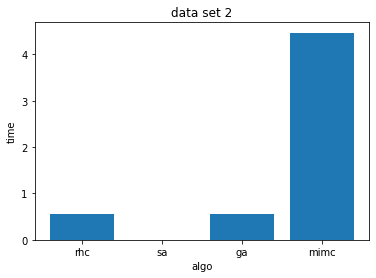

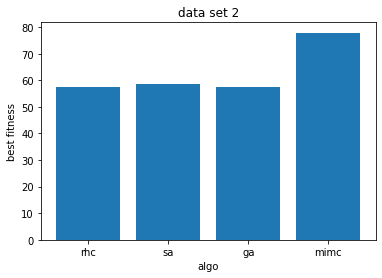

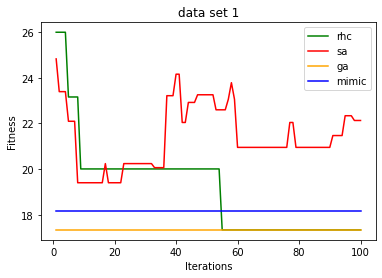

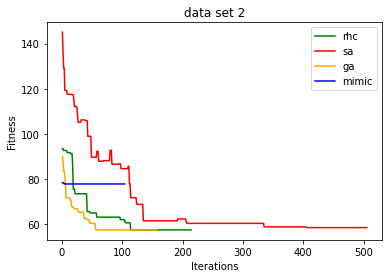

In [10]:
curves = [curve_rhc, curve_sa, curve_ga, curve_mimic,
          curve_rhc2, curve_sa2, curve_ga2, curve_mimic2]
graph(fps, fps2, curves)